In [89]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [90]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv('lending_data.csv')

# Review the DataFrame
print(f"head:{df.head()}\n")
print(df.info())
print(df.describe())

head:   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   

   derogatory_marks  total_debt  loan_status  
0                 1       22800            0  
1                 0       13600            0  
2                 0       16100            0  
3                 1       22700            0  
4                 1       23000            0  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [91]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df["loan_status"]

# Separate the X variable, the features
x = df.drop(columns=["loan_status"])
print(x.head())

   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   

   derogatory_marks  total_debt  
0                 1       22800  
1                 0       13600  
2                 0       16100  
3                 1       22700  
4                 1       23000  


In [92]:
# Review the y variable Series
print(y.head())
print(y.info())

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 77536 entries, 0 to 77535
Series name: loan_status
Non-Null Count  Dtype
--------------  -----
77536 non-null  int64
dtypes: int64(1)
memory usage: 605.9 KB
None


In [93]:
# Review the X variable DataFrame
print(x.head())
print(x.info())

   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   

   derogatory_marks  total_debt  
0                 1       22800  
1                 0       13600  
2                 0       16100  
3                 1       22700  
4                 1       23000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower

### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [94]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Features Shape: (54275, 7)
Testing Features Shape: (23261, 7)
Training Labels Shape: (54275,)
Testing Labels Shape: (23261,)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [95]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1, penalty='l2', solver='liblinear')

# Fit the model using training data
print(model)

LogisticRegression(random_state=1, solver='liblinear')


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [96]:
# Make a prediction using the testing data
model.fit(X_train, y_train)
#y_pred = model.predict(X_test)
#print("Predictions on testing data:", y_pred[:10])

LogisticRegression(random_state=1, solver='liblinear')

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

[[22393   122]
 [   45   701]]


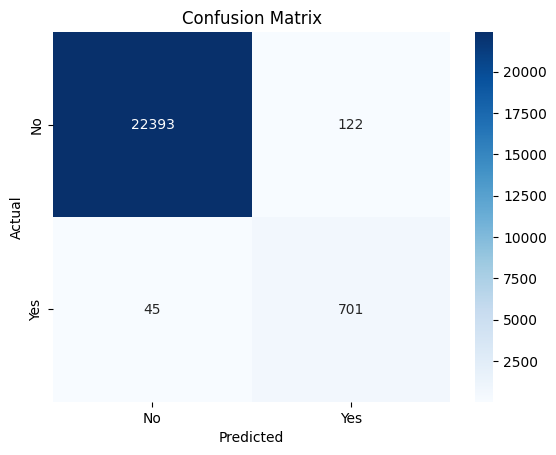

In [97]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, y_pred)
print(cm)
# visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [98]:
# Print the classification report for the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     22515
           1       0.85      0.94      0.89       746

    accuracy                           0.99     23261
   macro avg       0.92      0.97      0.94     23261
weighted avg       0.99      0.99      0.99     23261



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 
```text
Healthy loans (class 0): 
        -near perfect precision (1 => correct 100%), 
        -recall 0.99 => correctly identified 99% of the 0 labels, hence 1% of healthy oans where wrongly qaulified as high risk
        -f1 score = 1.0 => harmonic mean of precision and recall is good
        -support - 22515 instances of class 0 in the test
High risk loans (class 1): 
        -precision 0.85 => predicting 1, it is correct in 85% cases => needs to be improved
        -recall 0.94 => correctly identified 94% of the high risk cases
        -f1 score = 0.89 => strong balance between precision & recall
        -support - 746 instances of class 1 in the test set
```

---